<a href="https://colab.research.google.com/github/ashikabansal123-collab/Retail_Sales_Time_Series_Analysis_Final.ipynb/blob/main/Trend_Analysis_and_Content_Distribution_Study_of_Netflix_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [6]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")   # Make sure filename matches exactly
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
import os
os.listdir()

['.config', 'netflix_titles.csv', 'sample_data']

In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [9]:
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added'],
      dtype='object')

In [13]:
df.columns = df.columns.str.strip()

In [14]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Convert date column safely
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year
df['year_added'] = df['date_added'].dt.year

df[['date_added','year_added']].head()

,date_added,year_added
0,2021-09-25,2021.0
1,2021-09-24,2021.0
2,2021-09-24,2021.0
3,2021-09-24,2021.0
4,2021-09-24,2021.0


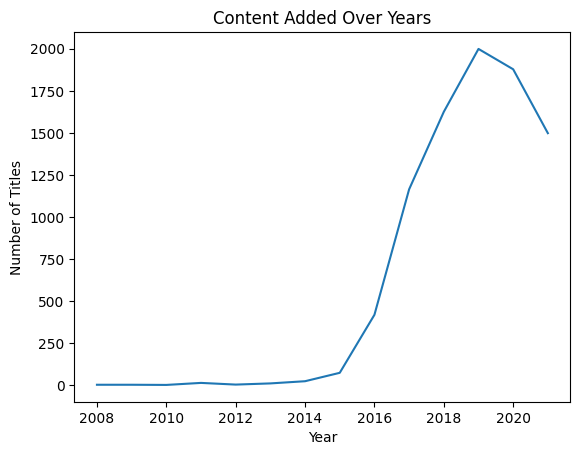

In [16]:
plt.figure()
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title("Content Added Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

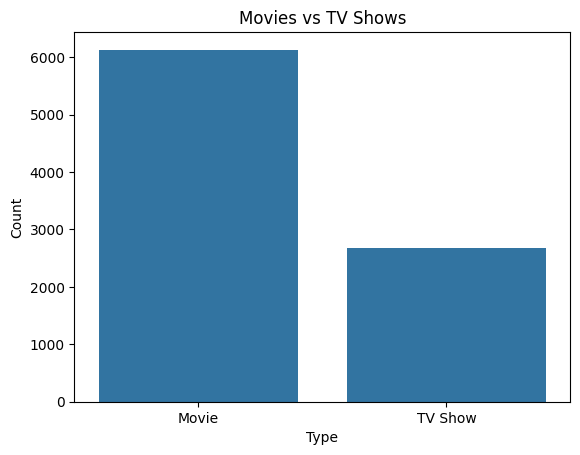

In [17]:
plt.figure()
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

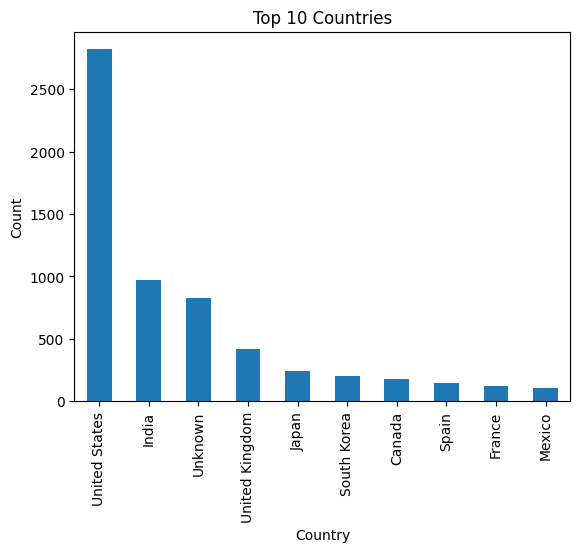

In [18]:
top_countries = df['country'].value_counts().head(10)

plt.figure()
top_countries.plot(kind='bar')
plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

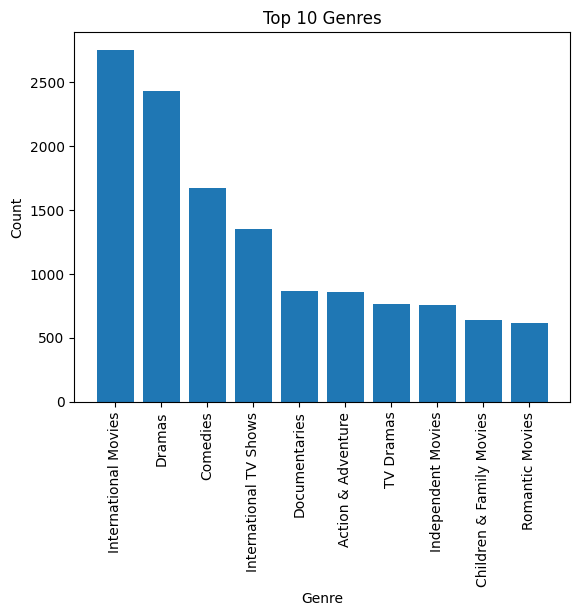

In [19]:
from collections import Counter

genres = df['listed_in'].str.split(', ')
all_genres = [genre for sublist in genres for genre in sublist]

genre_count = Counter(all_genres)
top_genres = pd.DataFrame(genre_count.most_common(10), columns=['Genre','Count'])

plt.figure()
plt.bar(top_genres['Genre'], top_genres['Count'])
plt.xticks(rotation=90)
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

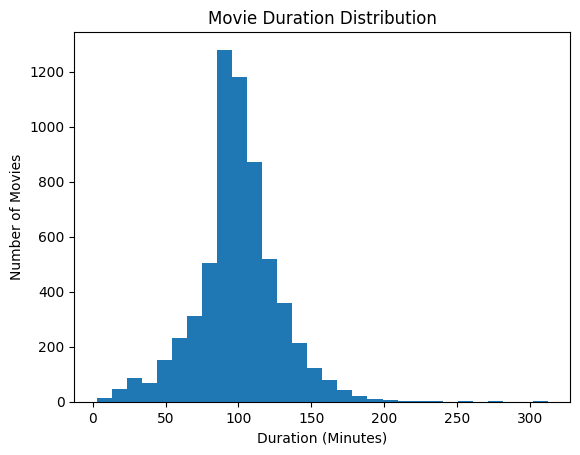

In [22]:
# Select only Movies
movies = df[df['type'] == 'Movie'].copy()

# Keep only rows that contain 'min'
movies = movies[movies['duration'].str.contains('min', na=False)]

# Remove ' min' text
movies['duration'] = movies['duration'].str.replace(' min','', regex=False)

# Convert to integer
movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')

# Drop any remaining NaN values
movies = movies.dropna(subset=['duration'])

# Plot
plt.figure()
plt.hist(movies['duration'], bins=30)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Number of Movies")
plt.show()

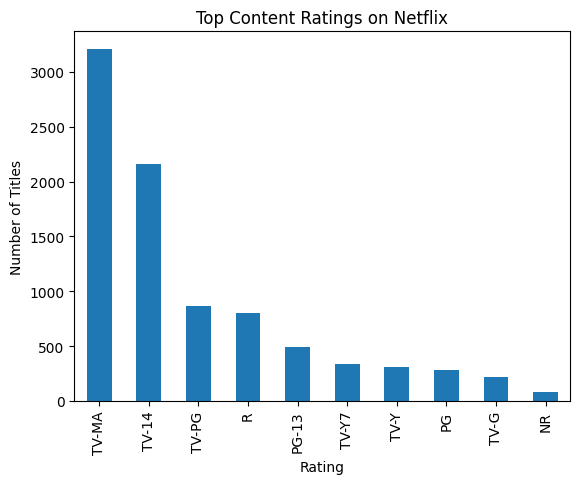

In [23]:
plt.figure()

df['rating'].value_counts().head(10).plot(kind='bar')

plt.title("Top Content Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.show()

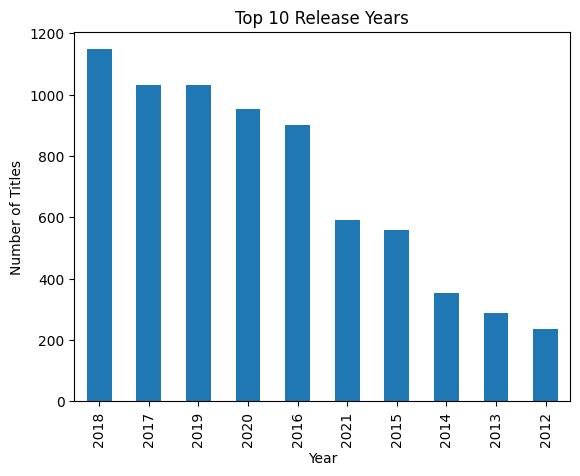

In [24]:
plt.figure()

df['release_year'].value_counts().head(10).plot(kind='bar')

plt.title("Top 10 Release Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

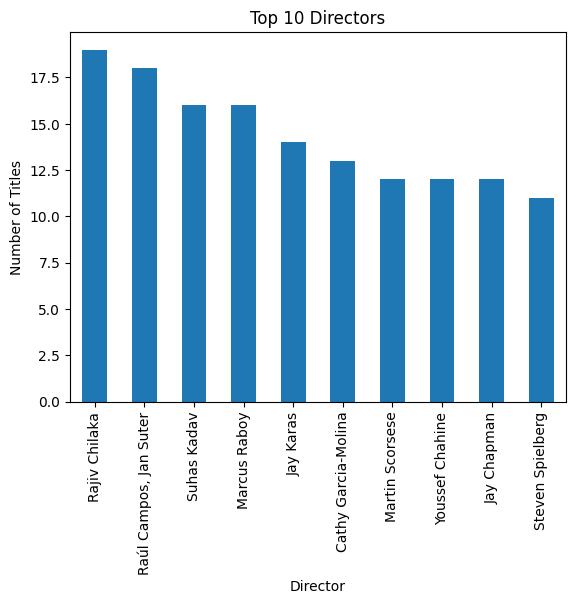

In [25]:
top_directors = df[df['director'] != "Unknown"]['director'].value_counts().head(10)

plt.figure()
top_directors.plot(kind='bar')
plt.title("Top 10 Directors")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.show()

Key Insights
• Netflix has more Movies compared to TV Shows.
• Content addition increased rapidly after 2015, showing platform growth.
• TV-MA rating dominates the platform, meaning more mature content.
• United States produces the highest number of titles.
• Drama and International content are most common genres.
• Most movies are between 80–120 minutes long.